In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#Load the dataset
df = pd.read_csv('traffic_accidents_c6.csv')
#Display the first 10 rows of the dataset    
print(df.head(10))

In [ ]:
#Check for missing values and handle them appropriately
df = pd.read_csv('traffic_accidents_c6.csv')
df.dropna(inplace = True)
#Create a new column crash_month to store the accident month as a name
df['crash_month'] = pd.to_datetime(df['crash_date']).dt.month_name()
#Create a new column crash_day to store the accident day as a name
df['crash_day'] = pd.to_datetime(df['crash_date']).dt.day_name()
#Display the first 10 rows of the dataset with the new column  
print(df.head(10))

In [ ]:
#Identify and list categorical columns.
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
print("Categorical columns:", categorical_cols)

#Count the number of unique values for each categorical variable.
unique_counts = df[categorical_cols].nunique()
print("Unique values per categorical column:\n", unique_counts)

#Generate descriptive statistics for numerical features.
numerical_stats = df.describe()
print("Descriptive statistics for numerical features:\n", numerical_stats)


C:\Users\Rodney\AppData\Local\Temp\ipykernel_12616\2373944360.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['crash_month'] = pd.to_datetime(df['crash_date']).dt.month_name()


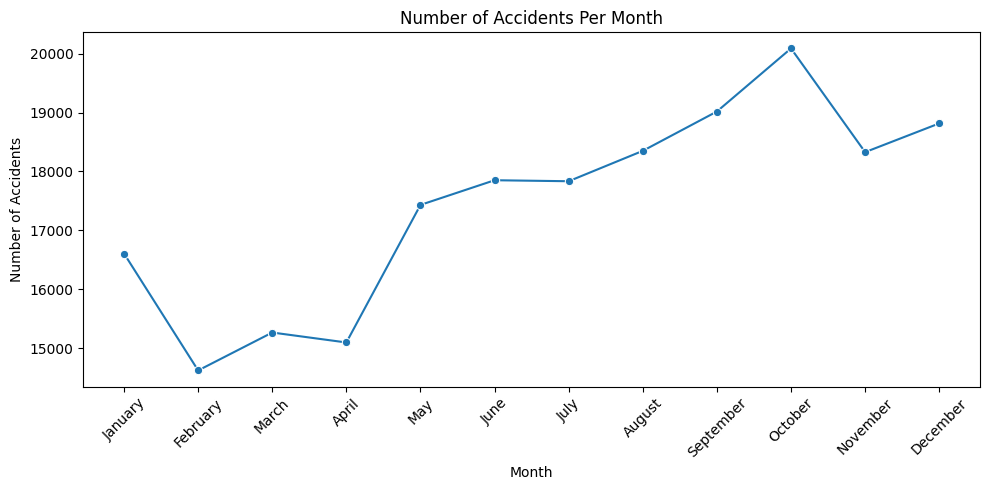

In [21]:
# Visualize the number of accidents per month using a line plot.
df['crash_month'] = pd.to_datetime(df['crash_date']).dt.month_name()

accidents_per_month = df['crash_month'].value_counts().reindex([
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
])

plt.figure(figsize=(10, 5))
sns.lineplot(x=accidents_per_month.index, y=accidents_per_month.values, marker='o')
plt.title('Number of Accidents Per Month')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




C:\Users\Rodney\AppData\Local\Temp\ipykernel_12616\1435479331.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['crash_day'] = pd.to_datetime(df['crash_date']).dt.day_name()
C:\Users\Rodney\AppData\Local\Temp\ipykernel_12616\1435479331.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=accidents_per_day.index, y=accidents_per_day.values, palette="Set2")


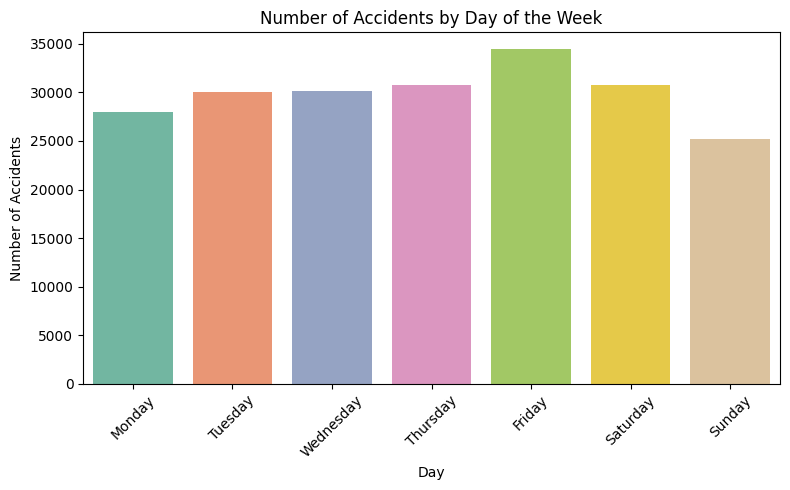

In [20]:
# Visualize the number of accidents per day of the week using a bar chart.
df['crash_day'] = pd.to_datetime(df['crash_date']).dt.day_name()
accidents_per_day = df['crash_day'].value_counts().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])
plt.figure(figsize=(8, 5))
sns.barplot(x=accidents_per_day.index, y=accidents_per_day.values, palette="Set2")
plt.title('Number of Accidents by Day of the Week')
plt.xlabel('Day')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [24]:
print(df.columns)

Index(['crash_date', 'lighting_condition', 'first_crash_type', 'crash_type',
       'prim_contributory_cause', 'num_units', 'most_severe_injury',
       'injuries_total', 'injuries_fatal', 'crash_hour', 'crash_month',
       'crash_day'],
      dtype='object')


C:\Users\Rodney\AppData\Local\Temp\ipykernel_12616\2212023755.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['crash_hour'] = pd.to_datetime(df['crash_date_clean'], errors='coerce').dt.hour


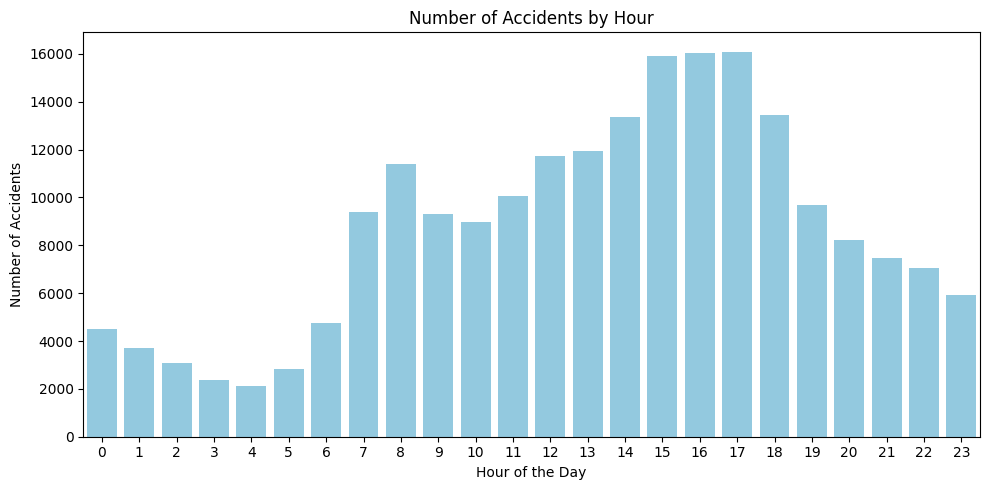

In [ ]:
# Identify the most accident-prone hour of the day and visualize it using an appropriate plot.
# Striping extra spaces first
df['crash_date_clean'] = df['crash_date'].str.strip()

# parsing with flexible format
df['crash_hour'] = pd.to_datetime(df['crash_date_clean'], errors='coerce').dt.hour


accidents_per_hour = df['crash_hour'].value_counts().sort_index()
plt.figure(figsize=(10, 5))
sns.barplot(x=accidents_per_hour.index, y=accidents_per_hour.values, color="skyblue")
plt.title('Number of Accidents by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Accidents')
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

C:\Users\Rodney\AppData\Local\Temp\ipykernel_12616\2143596183.py:19: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  filtered_df['crash_month'] = pd.to_datetime(filtered_df['crash_date'], errors='coerce').dt.month_name()
C:\Users\Rodney\AppData\Local\Temp\ipykernel_12616\2143596183.py:28: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  accidents_by_light = filtered_df.groupby(['crash_month', 'light_type']).size().reset_index(name='count')


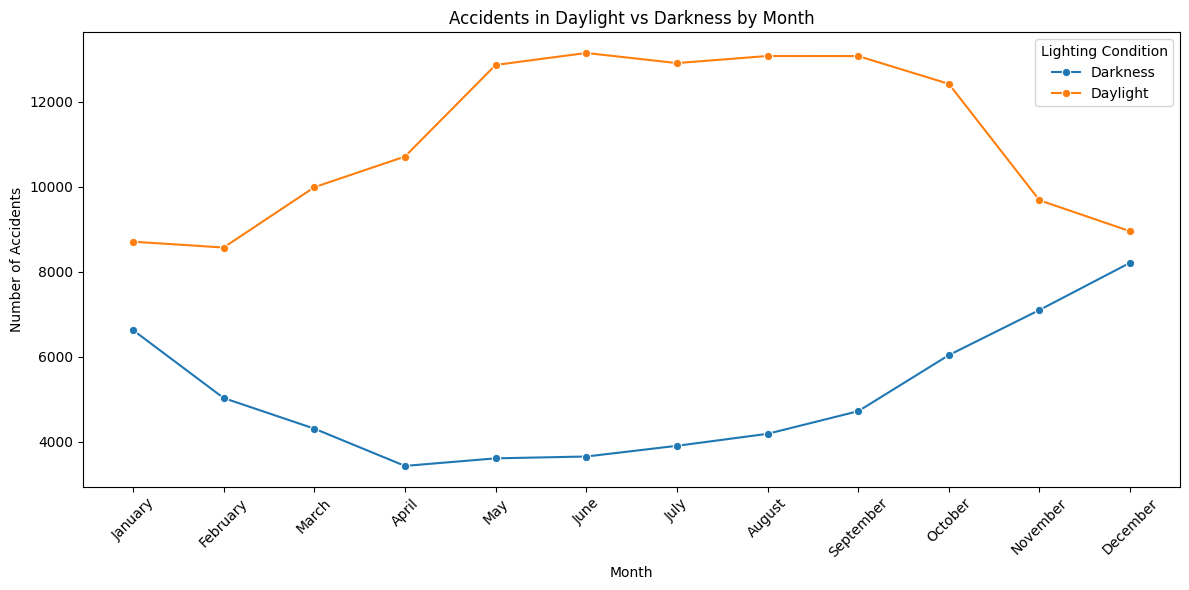

In [34]:
# Compare the number of accidents that occurred in daylight and in darkness using two lines on the same plot.
# Step 1: Filter relevant lighting conditions
filtered_df = df[df['lighting_condition'].isin([
    'DAYLIGHT',
    'DARKNESS',
    'DARKNESS, LIGHTED ROAD'
])].copy()

# Step 2: Map to 'Daylight' or 'Darkness'
def map_light_condition(cond):
    if 'DARK' in cond:
        return 'Darkness'
    else:
        return 'Daylight'

filtered_df['light_type'] = filtered_df['lighting_condition'].apply(map_light_condition)

# Step 3: Extract crash month
filtered_df['crash_month'] = pd.to_datetime(filtered_df['crash_date'], errors='coerce').dt.month_name()

# Step 4: Group by month and light type
from pandas.api.types import CategoricalDtype

month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
filtered_df['crash_month'] = filtered_df['crash_month'].astype(CategoricalDtype(categories=month_order, ordered=True))

accidents_by_light = filtered_df.groupby(['crash_month', 'light_type']).size().reset_index(name='count')
accidents_by_light = accidents_by_light.sort_values('crash_month')

# Step 5: Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=accidents_by_light, x='crash_month', y='count', hue='light_type', marker='o')
plt.title('Accidents in Daylight vs Darkness by Month')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.legend(title='Lighting Condition')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\Rodney\AppData\Local\Temp\ipykernel_12616\1872959435.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_crash_types.index, y=top_crash_types.values, palette='viridis')


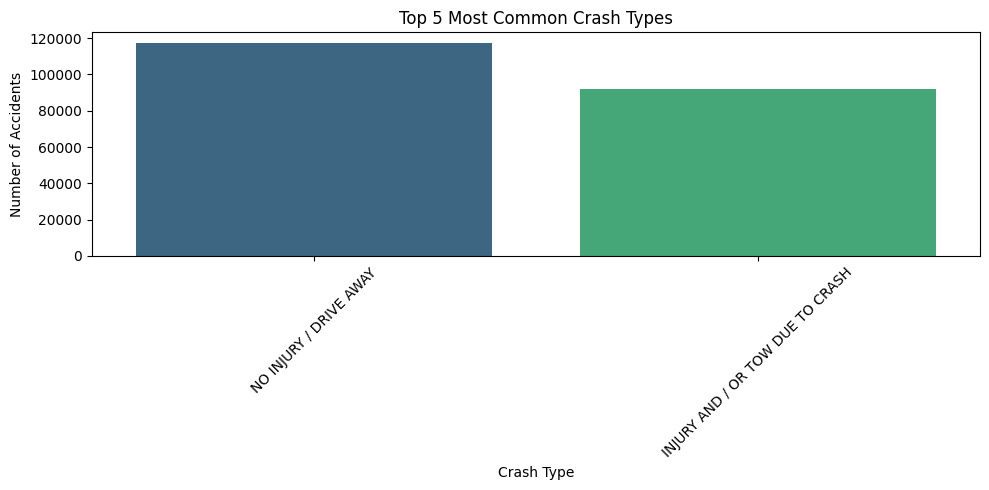

In [ ]:
#Identify the top 5 most common crash types and visualize them using a bar chart.
top_crash_types = df['crash_type'].value_counts().nlargest(5)

# Plotting the top crash types
plt.figure(figsize=(10, 5))
sns.barplot(x=top_crash_types.index, y=top_crash_types.values, palette='viridis')
plt.title('Most Common Crash Types')
plt.xlabel('Crash Type')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\Rodney\AppData\Local\Temp\ipykernel_12616\530505224.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_accident_causes.index, y=top_accident_causes.values, palette='viridis')


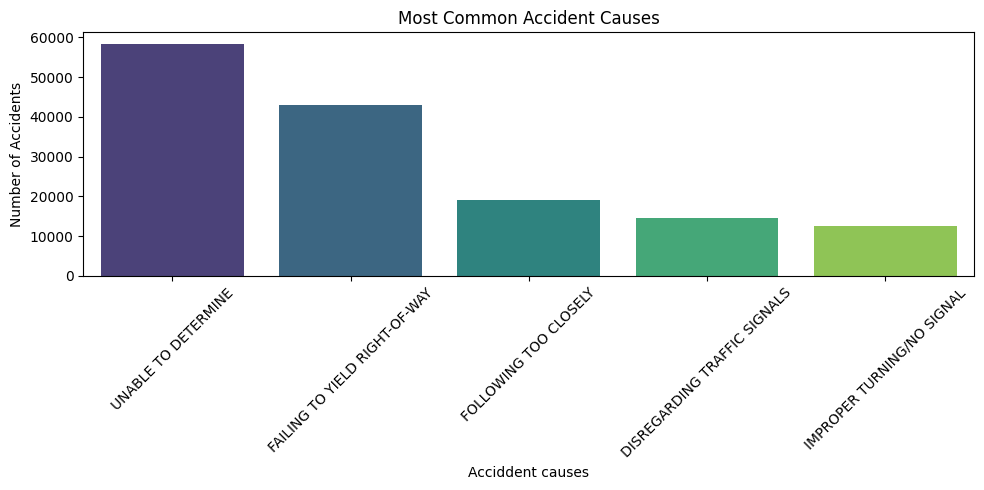

In [36]:
top_accident_causes = df['prim_contributory_cause'].value_counts().nlargest(5)


# Plotting the top crash types
plt.figure(figsize=(10, 5))
sns.barplot(x=top_accident_causes.index, y=top_accident_causes.values, palette='viridis')
plt.title('Most Common Accident Causes')
plt.xlabel('Acciddent causes')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\Rodney\AppData\Local\Temp\ipykernel_12616\2689176044.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['crash_datetime'] = pd.to_datetime(df['crash_date'], errors='coerce')
C:\Users\Rodney\AppData\Local\Temp\ipykernel_12616\2689176044.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fatal_by_hour.index, y=fatal_by_hour.values, palette='rocket')


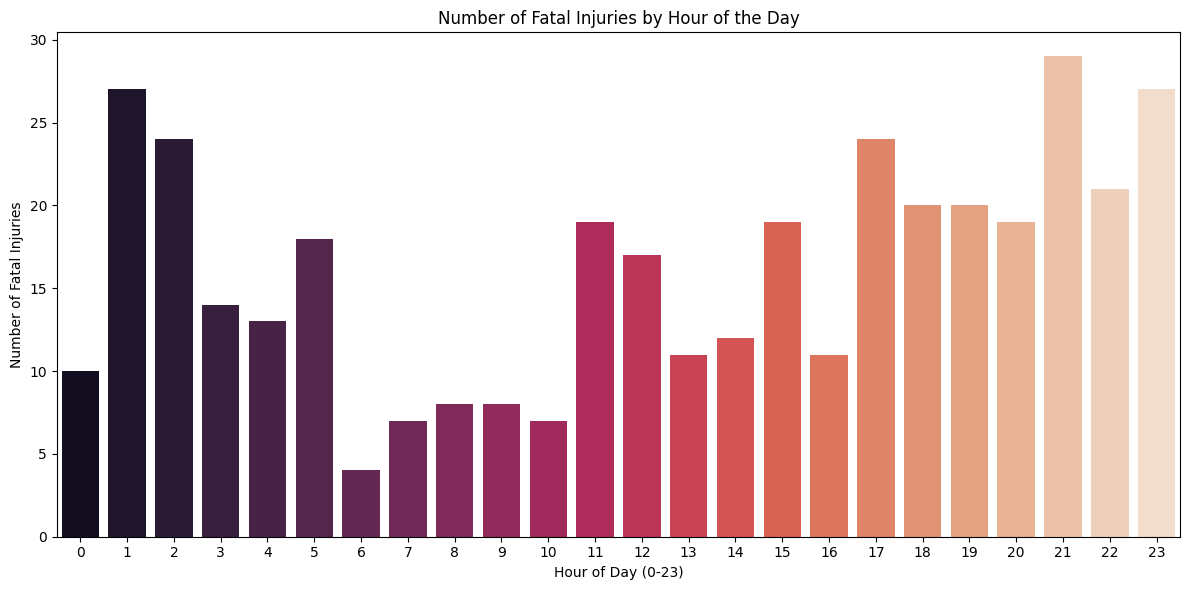

In [39]:
#Display the number of fatal injuries at each hour of the day using a bar chart.
# Step 1: Convert crash_date to datetime
df['crash_datetime'] = pd.to_datetime(df['crash_date'], errors='coerce')

# Step 2: Extract the crash hour
df['crash_hour'] = df['crash_datetime'].dt.hour

# Step 3: Group by crash hour and sum fatal injuries
fatal_by_hour = df.groupby('crash_hour')['injuries_fatal'].sum()

# Step 4: Plot the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=fatal_by_hour.index, y=fatal_by_hour.values, palette='rocket')
plt.title('Number of Fatal Injuries by Hour of the Day')
plt.xlabel('Hour of Day (0-23)')
plt.ylabel('Number of Fatal Injuries')
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()




In [ ]:
#Create a heatmap to analyze accident occurrences across different hours of the day and days of the week.